2023 Summer Research: Stabilizing Laser Wavelengths with the Fabry-Perot Cavity

Research by: Hannah Dale Alberti & Jayda Gilyard

Advisor: Professor Paul Hess

Code by: Jayda Gilyard

Data gathered by: Hannah Dale Alberti & Professor Paul Hess

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.insert(0,'/content/gdrive/MyDrive/Colab Notebooks')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import lasermodule as lm
import scipy.signal as sp

In [ ]:
index = np.arange(3)

bf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NuView log withlock.csv')
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tek0005ALL.csv")
nf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tek0008ALL.csv")
pf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/NuView without lock.csv")
sf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/tek0002ALL.csv")
uf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/NuView log topfringe.csv")
vf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Waveform.csv")
wf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Waveform2.csv")
xf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/WaveformHeNe.csv")
yf = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Waveformshene3.csv")
zf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/bothlasers.csv')
af = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/just369laser.csv')
cf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/justHENE.csv')
ef = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/nolock810.csv')
ff = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/sidelock810.csv')
gf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/toplock810.csv')

In [ ]:
poorlaser = sf[sf['TIME'].between(-0.0357 , 1.33 * 10 ** -3)]

welllaser = df[df['TIME'].between(-0.0357 , 1.32 * 10 ** -3)]

wavemeter = nf[nf['TIME'].between(-1.04 * 10 ** -1 , 1.60 * 10 ** -1)]

waveforms = vf[vf['X'].between(0, 1199)]

waveformspt2 = wf[wf['X'].between(0, 1199)]

waveformshene = xf[xf['X'].between(0, 1199)]

waveformhene3 = yf[yf['X'].between(0, 1199)]

bothlasers = zf[zf['X'].between(0, 1199)]

just369 = af[af['X'].between(0, 1199)]

justHENE = cf[cf['X'].between(0, 1199)]

Friday, July 14th, 2023: The graph below compares the interference patterns between a poorly aligned Fabry-Perot cavity and a well aligned Fabry-Perot cavity. By "poorly aligned" and "well aligned", this is indicative of the laser's alignment path when entering the cavity. If the laser's path does not directly enter into the cavity (e.g, some of the laser is hitting the outer rims), it creates jagged, wide interference patterns. On the other hand, however, if the laser's path is alomst perfectly aligned with the cavity's entrance, then it will create much clearer interference patterns, making it easy to see constructive interference within the cavity. The poorly-aligned cavity is labelled green, while the well aligned cavity is labelled orange. One significant difference that can be seen is that the peaks of the poorly-aligned cavity is significantly smaller than that of the well-aligned cavity. My hypothesis is that, due to the fact that our mirrors' positions being off by a few millimeters, most of the laser was not entering straight into the cavity. Since there was less light in the cavity, there was not much interference happening, causing the peaks picked up by the oscilloscope being significantly low. However, once the mirrors were re-adjusted, a large amount of wavelengths were now entering and interfering with each other in the cavity. This caused a larger number of wavelengths to constructively interfere with each other, creating larger peaks. What is also interesting to note is that there seems to be an inverse relationship between the peaks of the poorly-aligned cavity and the well-aligned cavity. Where constructive interference happens with the poorly-aligned cavity is where there is destructive interference with the well-aligned cavity, and vice versa. This is probably because the data was from two different days, so the waves were shifted between those two days.

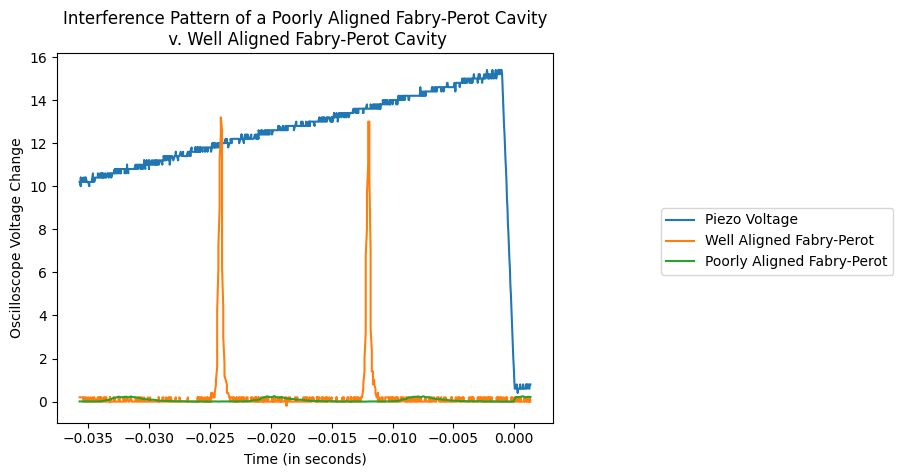

In [ ]:
fig, ax = plt.subplots()

ax.plot(welllaser['TIME'], welllaser['CH1'], label= "Piezo Voltage")
ax.plot(welllaser['TIME'], welllaser['CH2'], label= "Well Aligned Fabry-Perot")

ax.plot(poorlaser['TIME'], poorlaser['CH2'], label = "Poorly Aligned Fabry-Perot")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.6))
plt.title("Interference Pattern of a Poorly Aligned Fabry-Perot Cavity\n v. Well Aligned Fabry-Perot Cavity")
plt.xlabel("Time (in seconds)")
plt.ylabel("Oscilloscope Voltage Change")
plt.show()

In [ ]:
lm.finesse(welllaser['CH2'])

'The finesse is 35.8'

Friday, July 14th, 2023: The second graph was set to scale, dividing each of the different cavity versions' voltage by its respective maximum voltage. So for instance, the well aligned cavity's max voltage was 13.2V. Dividing this maximum from the well aligned cavity's voltage scaled the graph to make the poorly aligned cavity's interference patterns easier to see. In short, we are able to see the difference in width of each of the versions' peaks. The inverse relationship between the poorly aligned and well aligned laser is much easier to see, as well.

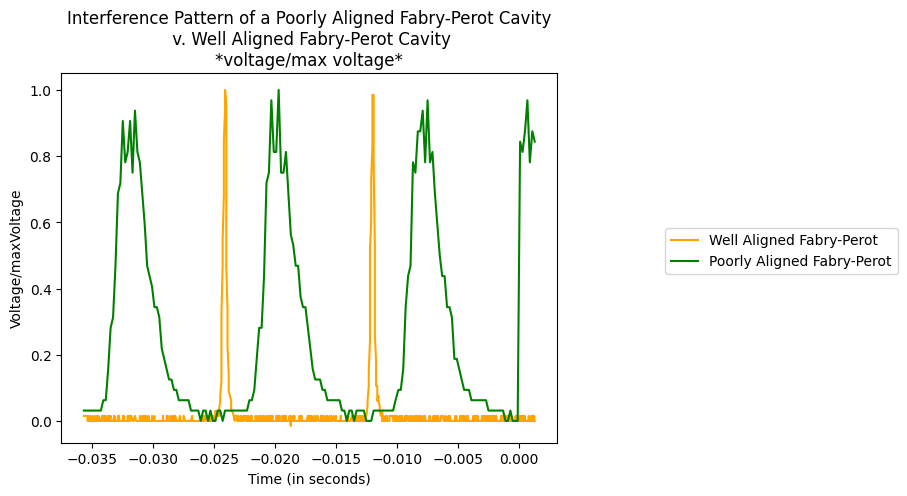

'The finesse is 4.6'

In [ ]:
fig, ax = plt.subplots()

maximum1 = np.max(welllaser['CH2'])

maximum2 = np.max(poorlaser['CH2'])

ax.plot(welllaser['TIME'], welllaser['CH2']/maximum1, label= "Well Aligned Fabry-Perot", color = "orange")

ax.plot(poorlaser['TIME'], poorlaser['CH2']/maximum2, label = "Poorly Aligned Fabry-Perot", color = "green")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.6))
plt.title("Interference Pattern of a Poorly Aligned Fabry-Perot Cavity\n v. Well Aligned Fabry-Perot Cavity\n*voltage/max voltage*")
plt.xlabel("Time (in seconds)")
plt.ylabel("Voltage/maxVoltage")
plt.show()

lm.finesse(poorlaser['CH2'])


Wednesday, July 19th, 2023: This graph represents the interference pattern of the laser withinn the Fabry-Perot cavity; however, the piezo's voltage within the cavity is being controlled by the wavemeter itself, which we can control using the DLC Pro software. Using this ramping method,  there should be two interference peaks per half a period, as shown here. However, the finesse is relatively low, as it is calculated to by about 44, when the Thor Labs website states that it should by 200.

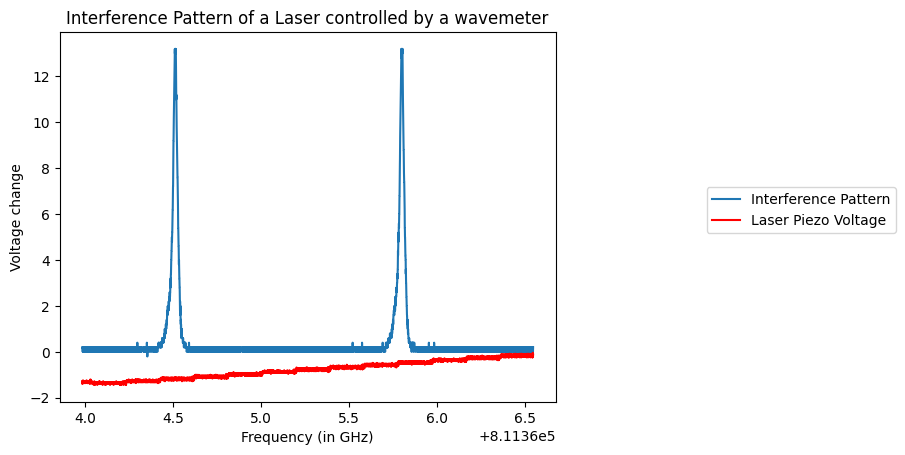

'The finesse is 44.4'

In [ ]:
fig, ax = plt.subplots()

frequency = np.linspace(811363.982, 811366.549, len(wavemeter['CH2']))

ax.plot(frequency, wavemeter['CH2'], label= "Interference Pattern" )
ax.plot(frequency, wavemeter['CH4'], label= "Laser Piezo Voltage", color = "red")


plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.6))
plt.title("Interference Pattern of a Laser controlled by a wavemeter")
plt.xlabel("Frequency (in GHz)")
plt.ylabel("Voltage change")
plt.show()

lm.finesse(wavemeter['CH2'])

Wednesday, July 26th, 2023: These two graphs each represents the effect that no locking, side-of-fringe locking, and top-of-fringe locking has on the drifting nature of the laser (for more info on locking, refer to OneNote --> Hess Lab --> 2023 --> Jayda and Hannah --> DLC Manuel Section 6.15). The first graph shows the overall drifitng patterns of each locking technique in a linear graph, while the second shows the standard deviations of each locking technique in a scatterplot. To gather each data, we have the DLC Pro software gather data points per 1 second for 15 minutes. As displayed here, the side-of-fringe locking and no locking both follow a similar upwards trend, while the top of fringe locking seems to remain relatively stable over a longer period of time. While this is indicitve of the top-of-fringe locking being more sutiable, it dodn't made sense that the side-of-fringe locking would make such a low impact, only seeming to smooth out the mode hops seen in the line without any locking. We decided to improve our setup by installing better, more reflective mirrors and a lens that would allow the laser to more percisely enter the cavity.

Thursday, August 10th, 2023: I have updated the standard deviation graph. Instead of finding the whole standard deviation and continueouly going down by 1/2, this graph is based off of subsets of the whole data. These subsets either contained half of the data, a quarter of the data, and either of the data, and so on. This made the standard deviation graph trends look smoother, and gave us a clearer indication of how each locking affected the drifting. Since the function I used to achieve this graph worked, I will transfer it to the new data.

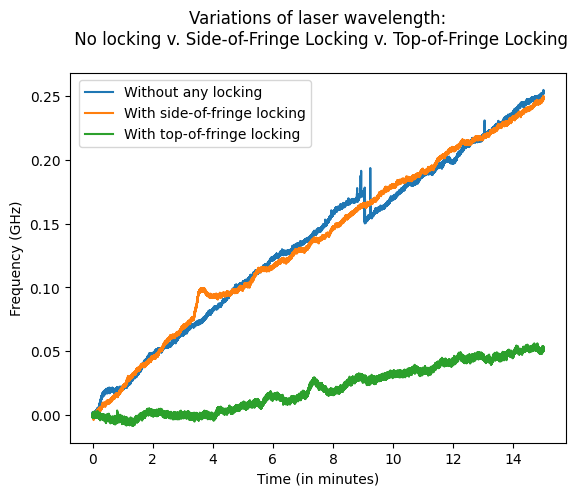

In [ ]:
fig, ax = plt.subplots()

time1 = np.linspace(0, 15, len(pf['Instrument Wavelength']))
time2 = np.linspace(0, 15, len(bf['Instrument Wavelength']))
time3 = np.linspace(0, 15, len(uf['Instrument Wavelength']))

ax.plot(time1, (pf['Instrument Wavelength'] - pf['Instrument Wavelength'][0]) , label= "Without any locking")
ax.plot(time2, (bf['Instrument Wavelength'] - bf['Instrument Wavelength'][0]), label= "With side-of-fringe locking")
ax.plot(time3, (uf['Instrument Wavelength'] - uf['Instrument Wavelength'][0]), label= "With top-of-fringe locking")

plt.legend(loc= 'upper right', bbox_to_anchor=(0.5, 1))
plt.title("Variations of laser wavelength:\n No locking v. Side-of-Fringe Locking v. Top-of-Fringe Locking\n")
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency (GHz)")
plt.show()

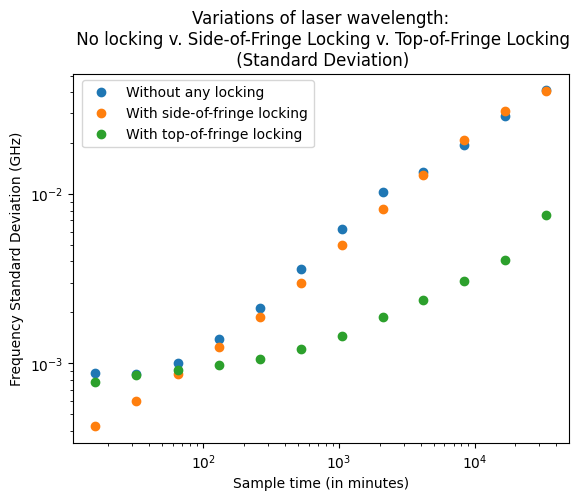

In [ ]:
x = lm.xaxis(uf['Instrument Wavelength'])

nolock = lm.standavg(pf['Instrument Wavelength'])
sidelock = lm.standavg(bf['Instrument Wavelength'])
toplock = lm.standavg(uf['Instrument Wavelength'])

fig, ax = plt.subplots()

ax.loglog(x, nolock, 'o', label= "Without any locking")
ax.loglog(x, sidelock, 'o', label= "With side-of-fringe locking")
ax.loglog(x, toplock, 'o', label= "With top-of-fringe locking")

plt.legend(loc= 'upper right', bbox_to_anchor=(0.5, 1))
plt.title("Variations of laser wavelength:\n No locking v. Side-of-Fringe Locking v. Top-of-Fringe Locking\n (Standard Deviation)")
plt.xlabel("Sample time (in minutes)")
plt.ylabel("Frequency Standard Deviation (GHz)")
plt.show()

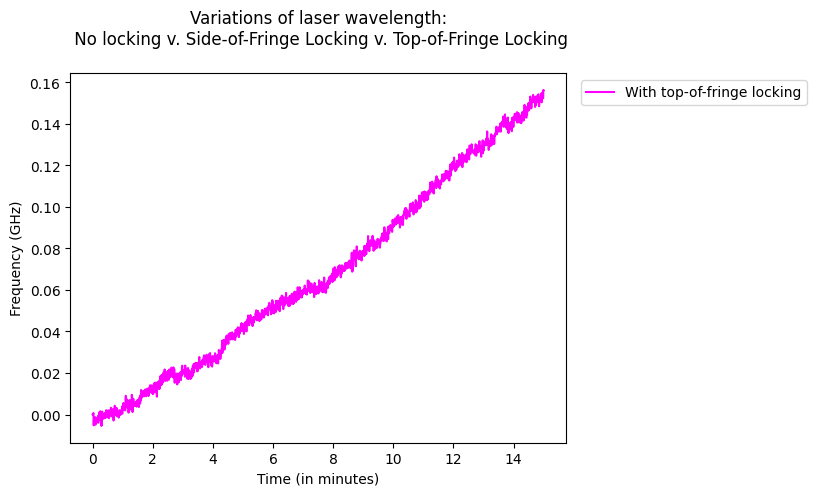

In [ ]:
fig, ax = plt.subplots()

time4 = np.linspace(0, 15, len(ef['Instrument Wavelength']))
#time5 = np.linspace(0, 15, len(ff['Instrument Wavelength']))
time6 = np.linspace(0, 15, len(gf['Instrument Wavelength']))

#ax.plot(time4, (ef['Instrument Wavelength'] - ef['Instrument Wavelength'][0]) , label= "Without any locking", color = 'yellow')
#ax.plot(time5, (ff['Instrument Wavelength'] - ff['Instrument Wavelength'][0]), label= "With side-of-fringe locking", color= 'aqua')
ax.plot(time6, (gf['Instrument Wavelength'] - gf['Instrument Wavelength'][0]), label= "With top-of-fringe locking", color = 'magenta')

plt.legend(loc= 'upper right', bbox_to_anchor=(1.5, 1))
plt.title("Variations of laser wavelength:\n No locking v. Side-of-Fringe Locking v. Top-of-Fringe Locking\n")
plt.xlabel("Time (in minutes)")
plt.ylabel("Frequency (GHz)")
plt.show()

#Friday, August 11th, 2023: Something seems wrong with this data. Need data redone.

Friday, August 4th, 2023: The following two graphs are the interference patterns within the Fabry-Perot Cavity with the inclusion of a longpass mirror. The longpass mirror, basically, filters certain wavelengths, and meant to block about 98% of the wavelengths that doesn't meet its criteria. The mirror is implemented into the set, and this is the resulting data. Despite the peaks being of considerable different sizes than the previous graphs, the finesse is largerly greater than the ones we had last time. The second graph is an updated version of the first, with some realignment, shown by the increased finesse.

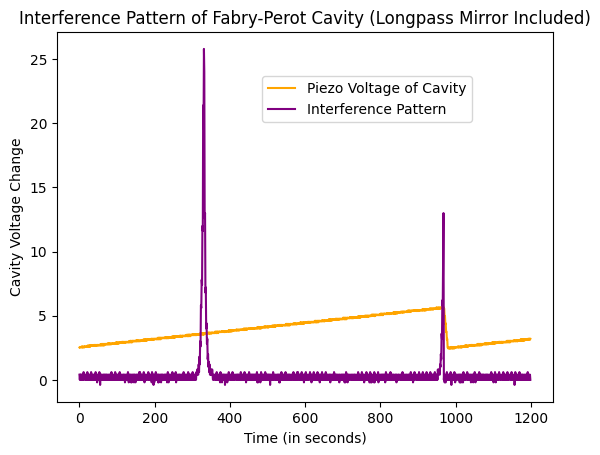

'The finesse is 130.6'

In [ ]:
fig, ax = plt.subplots()

ax.plot(waveforms['X'], waveforms['CH2'], label= "Piezo Voltage of Cavity", color= "orange" )
ax.plot(waveforms['X'], waveforms['CH3'], label= "Interference Pattern", color= "purple")

plt.legend(loc= 'upper right', bbox_to_anchor=(0.85, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (Longpass Mirror Included)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(waveforms['CH3'])

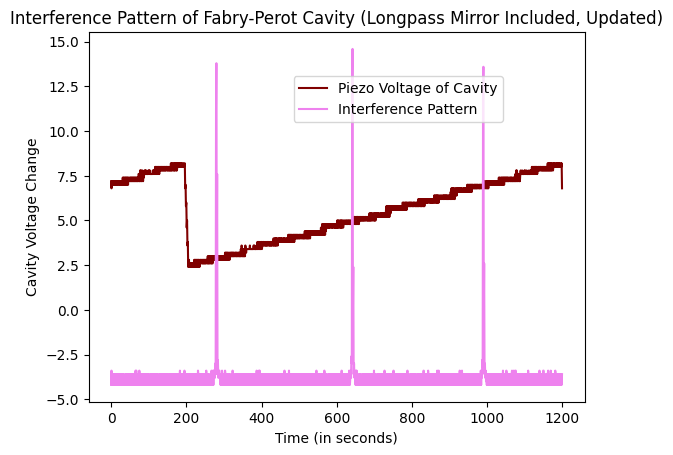

'The finesse is 159.8'

In [ ]:
fig, ax = plt.subplots()

ax.plot(waveformspt2['X'], waveformspt2['CH2'], label= "Piezo Voltage of Cavity", color= "maroon" )
ax.plot(waveformspt2['X'], waveformspt2['CH3'], label= "Interference Pattern", color= "violet")

plt.legend(loc= 'upper right', bbox_to_anchor=(0.85, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (Longpass Mirror Included, Updated)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(waveformspt2['CH3'])

Friday, August 4th, 2023: Ok, so to be completely frank, this graph isn't exactly canon to the overall experiment, since my partner, Hannah, just implemented it. However, I thought it would be interesting to see the interference pattern of the HeNe laser when its height wasn't adjusted so that it wasn't going completely into the cavity. As you can see, the height of the laser signifcantly affected the interference pattern we recieve from it. There are multiple mode hops within this set of data, along with some of the peaks plateuing. This finesse is largerly affected as well, since most peaks are significatly wide. A heighted-adjusted HeNe laser, however, decreases the absurity of the waveforms, as seen following this graph.

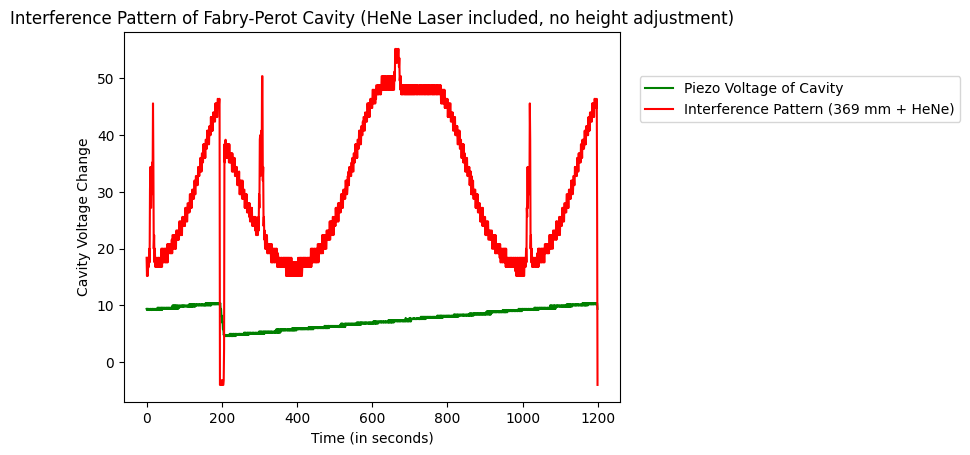

'The finesse is 0.5'

In [ ]:
fig, ax = plt.subplots()

ax.plot(waveformshene['X'], waveformshene['CH2'], label= "Piezo Voltage of Cavity", color= "green" )
ax.plot(waveformshene['X'], waveformshene['CH3'], label= "Interference Pattern (369 mm + HeNe)", color= "red")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (HeNe Laser included, no height adjustment)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(waveformshene['CH3'])

Friday, August 4th, 2023: This graph is the interference result of both the 369 laser and the HeNe laser being sent into the Fabry-Perot cavity. The height of the HeNe laser was readjusted in the graph, having narrower and shaper peaks. The amount of mode hopping has decreased as well. However, the peaks are still off, not occuring per half period as discussed, and the finesse being smaller than it was when it was just the 369 nm laser with the longpass mirror. There are also some bizare peaks either underneath or besides some of the peaks. This is because, not only is our cavity is not equipped to handle the HeNe laser, but our HeNe laser isn't that completely top-tier either. These two factors contribute to the somewhat odd waveforms, and there might be no real way to fix them with the technology we have now.  

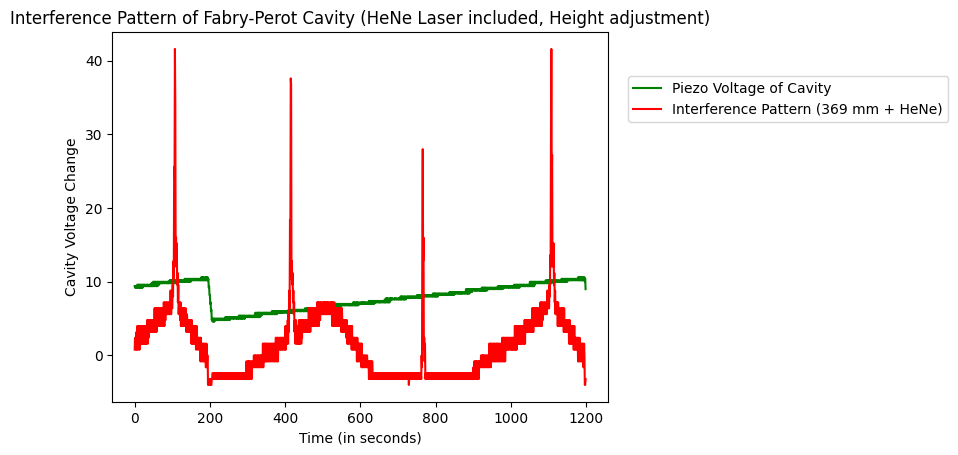

'The finesse is 73.1'

In [ ]:
fig, ax = plt.subplots()

ax.plot(waveformhene3['X'], waveformhene3['CH2'], label= "Piezo Voltage of Cavity", color= "green" )
ax.plot(waveformhene3['X'], waveformhene3['CH3'], label= "Interference Pattern (369 mm + HeNe)", color= "red")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (HeNe Laser included, Height adjustment)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(waveformhene3['CH3'])

Thursday, August 10th, 2023: This graph is an updated version of the 369 nmlaser with the longpass mirror. The laser's interference pattern still remains ideal, with the finesse of the waveform actually increasing by 10.

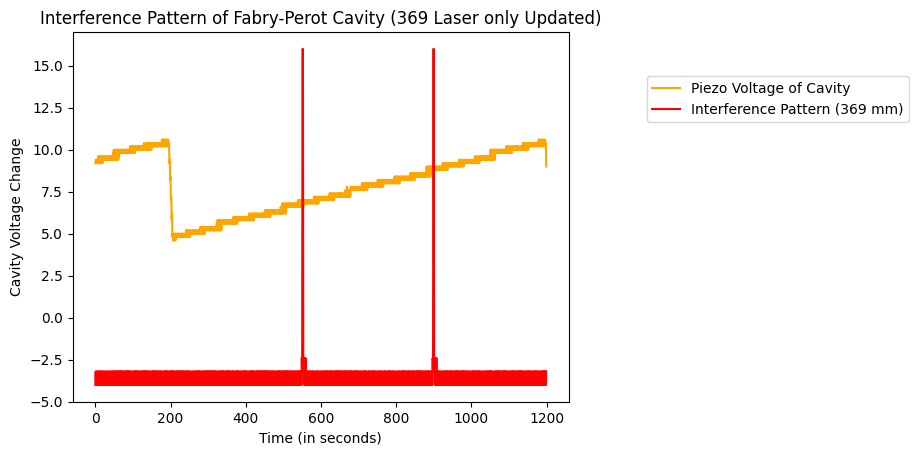

'The finesse is 170.4'

In [ ]:
fig, ax = plt.subplots()

ax.plot(just369['X'], just369['CH2'], label= "Piezo Voltage of Cavity", color= "orange" )
ax.plot(just369['X'], just369['CH3'], label= "Interference Pattern (369 mm)", color= "red")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (369 Laser only Updated)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(just369['CH3'])

Thursday, August 10th, 2023: This is an updated version of the HeNe laser interference, taken from yesterday. This graph more clearly shows how our current HeNe laser and Fabry-Perot cavity aren't up to par to produce proper peaks. As you can see, these peaks are thick and jagged, with its finesse being incredibly small.

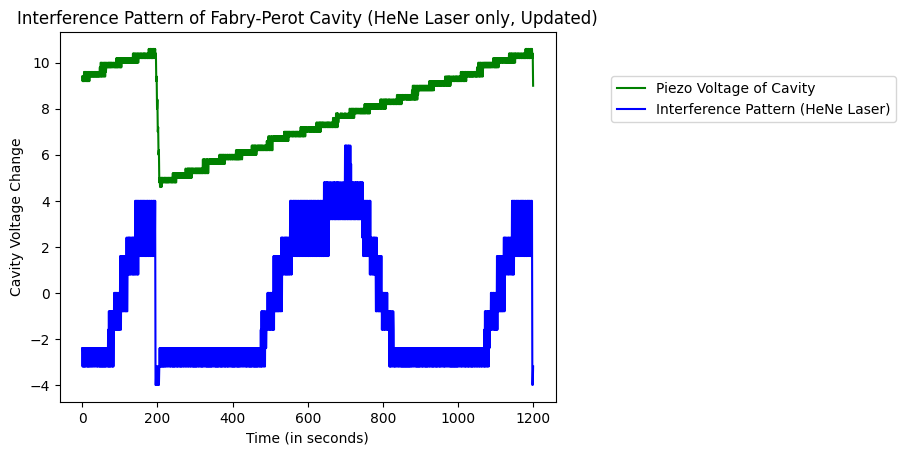

'The finesse is 0.2'

In [ ]:
fig, ax = plt.subplots()

ax.plot(justHENE['X'], justHENE['CH2'], label= "Piezo Voltage of Cavity", color= "green" )
ax.plot(justHENE['X'], justHENE['CH3'], label= "Interference Pattern (HeNe Laser)", color= "blue")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (HeNe Laser only, Updated)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(justHENE['CH3'])

Thursday, August 10th, 2023: This is an updated graph of the interference pattern of both the 369 laser and the HeNe laser. The unsutiable nature of the HeNe laser's waveform vs the stable nature of the 369 nm laser can be seen, as the resulting interference pattern is a strange amagalmation of both of them. This can be also seen in the finesse, as this waveform seem to have a happy middle between the 170 finesse of the 369 laser and the 0.2 finesse of the HeNe laser.

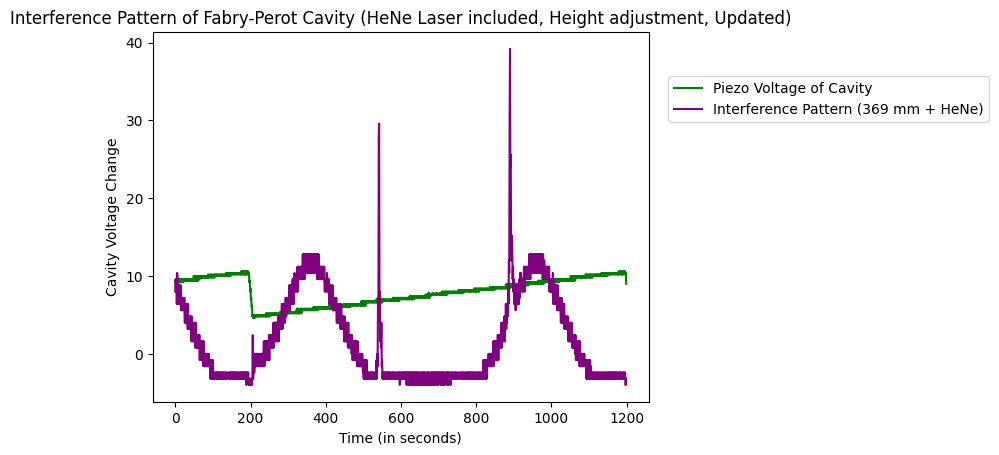

'The finesse is 81.6'

In [ ]:
fig, ax = plt.subplots()

ax.plot(bothlasers['X'], bothlasers['CH2'], label= "Piezo Voltage of Cavity", color= "green" )
ax.plot(bothlasers['X'], bothlasers['CH3'], label= "Interference Pattern (369 mm + HeNe)", color= "purple")

plt.legend(loc= 'upper right', bbox_to_anchor=(1.7, 0.9))
plt.title("Interference Pattern of Fabry-Perot Cavity (HeNe Laser included, Height adjustment, Updated)")
plt.xlabel("Time (in seconds)")
plt.ylabel("Cavity Voltage Change")
plt.show()

lm.finesse(bothlasers['CH3'])

In [1]:
# Clone your GitHub repo into Colab
!git clone https://github.com/ddaarroo/research-physics-2023.git

Cloning into 'research-physics-2023'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!find "/content/drive/MyDrive/Colab Notebooks" -type f -iname "*Gilyard.ipynb"

/content/drive/MyDrive/Colab Notebooks/2023_Summer_ Research_Professor_Paul_Hess_Hannah_Alberti _Jayda_Gilyard.ipynb


In [3]:
!cp "/content/drive/MyDrive/Colab Notebooks/2023_Summer_ Research_Professor_Paul_Hess_Hannah_Alberti_Jayda_Gilyard.ipynb" /content/research-physics-2023/

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/2023_Summer_ Research_Professor_Paul_Hess_Hannah_Alberti_Jayda_Gilyard.ipynb': No such file or directory
